In [1]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib inline
plt.rcParams['animation.ffmpeg_path'] = '/Users/fraser/opt/miniconda3/envs/project/bin/ffmpeg'
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['figure.figsize'] = 15, 5


import pandas as pd 
import numpy as np
import os

from pyts.image import GramianAngularField, MarkovTransitionField
from sklearn.model_selection import train_test_split

In [2]:
vib_directory = "/Users/fraser/Uni/Year 3/Project/code/data/"

In [3]:
vib_files = []

for adir in os.listdir(vib_directory):
    if not adir.startswith('.'):
        bdir = vib_directory + f'{adir}/'
        for cdir in os.listdir(bdir):
            if not cdir.startswith('.'):
                ddir = bdir + f'{cdir}/'
                for afile in os.listdir(ddir):
                    if 'vibration' in afile:
                        filepath = ddir + afile
                        vib_files.append(filepath)

In [4]:
classes = {'rotor':['1bar', '4bars', '8bars'],
           'bearing':['inner', 'outer', 'ball'],
           'healthy':['healthy']}

vib_files_labelled = {}

for aclass in classes:
    aclass_list = []
    for subclass in classes[aclass]:
        for filename in vib_files:
            if subclass in filename:
                aclass_list.append(filename)

        vib_files_labelled[aclass] = aclass_list     

In [5]:
vib_files_labelled

{'rotor': ['/Users/fraser/Uni/Year 3/Project/code/data/1bar/half_load/half_load_vibration_data_1bar_half_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/1bar/no_load/no_load_vibration_data_1bar_no_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/1bar/full_load/full_load_vibration_data_1bar_full_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/4bars/half_load/half_load_vibration_data_4bars_half_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/4bars/full_load/full_load_vibration_data_4bars_full_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/8bars/half_load/half_load_vibration_data_8bars_half_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/8bars/no_load/no_load_vibration_data_8bars_no_load.csv'],
 'bearing': ['/Users/fraser/Uni/Year 3/Project/code/data/inner/half_load/half_load_vibration_data_inner_half_load.csv',
  '/Users/fraser/Uni/Year 3/Project/code/data/inner/no_load/no_load_vibration_data_inner_no_load.csv',
  '/Users/fraser/Uni/Y

In [50]:
vib = pd.read_csv(vib_files_labelled['rotor'][0])

In [51]:
vib.shape

(720000, 2)

In [52]:
vib.head()

,# time,vibration
0,0.000000,202.0
1,0.001667,189.0
2,0.003333,186.0
3,0.005000,128.0
4,0.006667,129.0


In [53]:
mtf = MarkovTransitionField(image_size=224,n_bins=3)

In [54]:
vib_arr = np.array(vib)

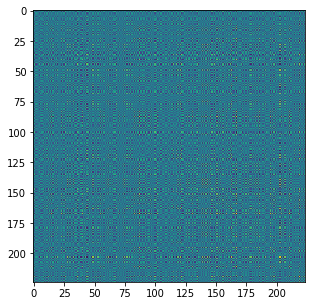

In [76]:
i = 0*6000
vib_mtf = mtf.fit_transform(vib[i:i+6000].T)
plt.imshow(vib_mtf[1])

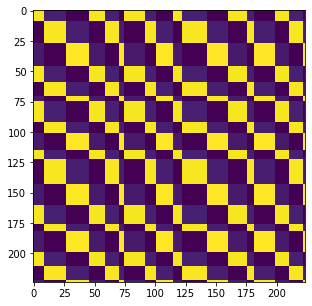

In [69]:
plt.imshow(vib_mtf[1])

In [137]:
gasf = GramianAngularField(image_size=224, method='difference', overlapping=True)

In [12]:
# 600 datapoints per second for 10 seconds = 6000 datapoints per 10 second sample

mtfs = {}

for aclass in classes:
    for subclass in classes[aclass]:
        
        mtf_list = []

        for afile in vib_files_labelled[aclass]:

            vib = np.array(pd.read_csv(afile))

            while vib.any():
                vib_mtf = mtf.fit_transform(vib[0:6000].T)
                mtf_list.append(vib_mtf[1])
                vib = np.delete(vib, slice(0,6000), 0)    

        # some faults only had data for 2/3 loading conditions so NaN appended instead
        while len(mtf_list) < 1080:
            mtf_list.append(None)


        mtfs[aclass] = mtf_list

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [1]. Consider decreasing the number of bins or removing these samples.
  "of bins or removing these samples.".format(samples))
/usr/local/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:161: UserWarning: Some quantiles are equal. The number of

KeyboardInterrupt: 

In [140]:
data = pd.DataFrame(gasfs)

In [141]:
data.head()

,rotor,bearing,healthy
0,"[[0.0, -0.5160636727113812, -0.741712927895150...","[[0.0, 0.3711852972174212, 0.2499387414252499,...","[[0.0, 0.32642770137312815, 0.5597926526524589..."
1,"[[0.0, 0.6338488245031233, 0.33099612050338983...","[[0.0, 0.46758873876613116, 0.641777819853684,...","[[0.0, -0.47881295943514873, 0.192174967692648..."
2,"[[0.0, -0.4100356220836461, -0.267281163217919...","[[0.0, -0.49022296285021333, -0.43526188293310...","[[0.0, -0.23734238297755827, -0.37301864887598..."
3,"[[0.0, 0.3940405131075778, -0.1274222374430575...","[[0.0, 0.09579503062237514, -0.082694729216758...","[[0.0, 0.08211717396256525, 0.0377779713588732..."
4,"[[0.0, 0.5243861237345179, 0.6696560603569657,...","[[0.0, 0.34063536551758844, 0.4541982065715916...","[[0.0, -0.12857257685014764, 0.231611727465275..."


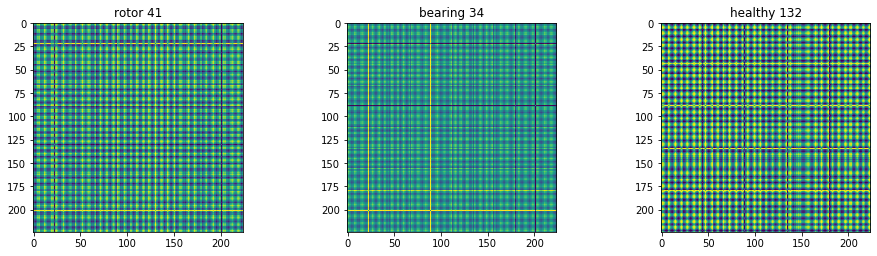

In [142]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=.5)

axs = axs.ravel()

for i, aclass in zip(range(3), classes):
    j = np.random.randint(0, 180)
    axs[i].imshow(data[aclass][j])
    axs[i].set_title(f"{aclass} {j}")

In [148]:
data_360 = data[['bearing','healthy']].dropna()

In [149]:
data_240 = data[['rotor']].dropna()

In [150]:
train_360, test_360 = train_test_split(data_360, test_size=0.2)

In [151]:
train_240, test_240 = train_test_split(data_240, test_size=0.2)

In [158]:
for aclass in train_360.columns:
    for i, gaf in enumerate(train_360[aclass]):
        if gaf.shape == (224, 224):
            train_path = '/Users/fraser/Uni/Year 3/Project/code/vibration_only_3cats/train/'
            file_path = f'{train_path}{aclass}/{aclass}_{i}.png'
            plt.imsave(file_path, gaf)

In [159]:
for aclass in train_240:
    for i, gaf in enumerate(train_240[aclass]):
        if gaf.shape == (224, 224):
            train_path = '/Users/fraser/Uni/Year 3/Project/code/vibration_only_3cats/train/'
            file_path = f'{train_path}{aclass}/{aclass}_{i}.png'
            plt.imsave(file_path, gaf)

In [160]:
for aclass in test_360.columns:
    for i, gaf in enumerate(test_360[aclass]):
        if gaf.shape == (224, 224):
            test_path = '/Users/fraser/Uni/Year 3/Project/code/vibration_only_3cats/test/'
            file_path = f'{test_path}{aclass}/{aclass}_{i}.png'
            plt.imsave(file_path, gaf)

In [161]:
for aclass in test_240:
    for i, gaf in enumerate(test_240[aclass]):
        if gaf.shape == (224, 224):
            test_path = '/Users/fraser/Uni/Year 3/Project/code/vibration_only_3cats/test/'
            file_path = f'{test_path}{aclass}/{aclass}_{i}.png'
            plt.imsave(file_path, gaf)